Lennart Martens

## Introduction

We have discussed that the three components to a machine learning algorithm are representation, optimization, and evaluation.  Amongst these steps is establishing a metric. Defining a metric, especially in the context of machine learning, is crucial because it provides a systematic way to measure the distance or similarity between data points. In mathematics, a metric or distance function is a function that defines a distance between each pair of elements in a set. A metric satisfies certain conditions:

1. **Non-negativity**:
   $$ d(x, y) \geq 0 $$
   The distance between any two points is always non-negative.

2. **Identity of Indiscernibles**:
   $$ d(x, y) = 0 \iff x = y $$
   The distance between two points is zero if and only if the points are identical.

3. **Symmetry**:
   $$ d(x, y) = d(y, x) $$
   The distance between two points is the same regardless of the order of the points.

4. **Triangle Inequality**:
   $$ d(x, z) \leq d(x, y) + d(y, z) $$

The distance between two points is less than or equal to the sum of the distances from each point to a third point. In machine learning, metrics are used for various purposes:
+ K-Nearest Neighbors (KNN): To find the 'k' closest data points to a given data point.
+ Clustering (like K-Means): To group similar data points together.
+ Dimensionality Reduction (like t-SNE): To project high-dimensional data into lower dimensions while preserving distances or similarities.
+ Recommendation Systems: To find items similar to a given item or users with similar preferences.

Common metrics used in machine learning include:
+ Euclidean Distance: The straight-line distance between two points in Euclidean space.
+ Manhattan Distance: The sum of the absolute differences of their coordinates, also known as L1 distance.
+ Cosine Similarity: Measures the cosine of the angle between two vectors, often used in text analysis.
+ Hamming Distance: Used for categorical data, it measures the number of positions at which the corresponding symbols are different.

Choosing the right metric is essential as it can significantly impact the performance and results of machine learning algorithms. The choice depends on the type of data and the specific requirements of the application. For instance, in a high-dimensional space, Euclidean distance can become less effective (known as the curse of dimensionality), and other metrics might be more suitable.

One interesting property of metrics is that the sum of two metrics is in fact a metric.  This means you can combine metrics to produce interesting outcomes as you will see in the first problem.  We can see the proof of this very simple fact as all we need to do is check if the sum satisfies the four properties of a metric:

1. **Non-negativity**
2. **Identity of Indiscernibles**
3. **Symmetry**
4. **Triangle Inequality**

Let $d_1$ and $d_2$ be two metrics on a set $X$. Define $d(x, y) = d_1(x, y) + d_2(x, y)$ for all $x, y \in X $. Now, let's check each property:

1. **Non-negativity**: 
   Since $ d_1 $ and $ d_2 $ are both metrics, $ d_1(x, y) \geq 0 $ and $ d_2(x, y) \geq 0 $ for all $ x, y $. Therefore, their sum $ d(x, y) = d_1(x, y) + d_2(x, y) \geq 0 $.

2. **Identity of Indiscernibles**: 
   For any $ x, y \in X $, $ d(x, y) = 0 $ if and only if $ d_1(x, y) = 0 $ and $ d_2(x, y) = 0 $. Since $ d_1$ and $ d_2 $ are metrics, $ d_1(x, y) = 0 $ if and only if $ x = y $, and the same for $ d_2 $. Hence, $ d(x, y) = 0 $ if and only if $ x = y $.

3. **Symmetry**: 
   For $ d_1 $ and $ d_2 $, $ d_1(x, y) = d_1(y, x) $ and $ d_2(x, y) = d_2(y, x) $. Thus, $ d(x, y) = d_1(x, y) + d_2(x, y) = d_1(y, x) + d_2(y, x) = d(y, x) $.

4. **Triangle Inequality**: 
   For any $ x, y, z \in X $, $ d_1 $ and $ d_2 $ satisfy the triangle inequality, so:
   $$ d_1(x, z) \leq d_1(x, y) + d_1(y, z) $$
   $$ d_2(x, z) \leq d_2(x, y) + d_2(y, z) $$
   Adding these two inequalities, we get:
   $$ d(x, z) = d_1(x, z) + d_2(x, z) \leq (d_1(x, y) + d_2(x, y)) + (d_1(y, z) + d_2(y, z)) = d(x, y) + d(y, z) $$

Since the sum $ d(x, y) = d_1(x, y) + d_2(x, y) $ satisfies all four metric properties, it is indeed a metric.

<img src="../images/cos_sim.jpg" alt="Drawing" style="width: 600px;"/>

In [1]:
import pandas as pd
import numpy as np

In [2]:
ratings = pd.read_csv('../data/ratings.csv')
movies = pd.read_csv('../data/movies.csv')

In [3]:
movieProperties = ratings.groupby('movieId').agg({'rating': [np.size, np.mean]})
movieNumRatings = pd.DataFrame(movieProperties['rating']['size'])
movieNormalizedNumRatings = movieNumRatings.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [4]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
# Build a list of unique genres
unique_genres = set()
for i in range(len(movies)):
    genres = movies['genres'].iloc[i].split('|')
    unique_genres.update(genres)

# Convert the set to a list for consistent ordering
all_genres = list(unique_genres)

# Process each movie
movieDict = {}
for i in range(len(movies)):
    movieID = int(movies['movieId'].iloc[i])
    name = movies['title'].iloc[i]
    movieGenres = movies['genres'].iloc[i].split('|')

    # Create a one-hot encoded array for genres
    genreArray = np.array([int(genre in movieGenres) for genre in all_genres])

    # Movie properties
    size = movieNormalizedNumRatings.loc[movieID].get('size') if movieID in movieNormalizedNumRatings.index else 0
    mean_rating = movieProperties.loc[movieID].rating.get('mean') if movieID in movieProperties.index else 0

    movieDict[movieID] = (name, genreArray, size, mean_rating)

We have generated a movie dictionary that contains movies, an encoding of their genres, and mean ratings.

>**Exercise 2-1:** Write a distance metric function *distance(x,y)* that calculates the combined cosine similarity metric of the genres of movies $x$ and $y$ and the $L_1$ metric of mean rating of movies $x$ and $y$.  Then calculate the distance between Mean Girls (MovieId = 7451) and A.I. Artificial Intelligence (MovieId = 4370). 

In [6]:
## Put your code below
def distance(x: int, y: int) -> int:
    cos_sim = np.dot(movieDict[x][1], movieDict[y][1]) / np.sqrt(np.sum(movieDict[x][1]) * np.sum(movieDict[y][1]))
    manhattan = np.absolute(movieDict[x][3] - movieDict[y][3])
    return cos_sim + manhattan

x, y = 7451, 4370
distance(x, y)

0.417124542124542

>**Exercise 2-2:**  Write a function *getNeighbors(MovieId, k)* that uses your *distance(x,y)* function and returns the $k$ nearest neighbors to the specified MovieId.  Then calculate for k = 10 and The Princess and the Warrior (MovieId = 4380).  It should return the titles and the distances sorted from closest to furthest.

In [7]:
## Put your code below
def getNeighbors(MovieID: int, k: int) -> list:
    neighbors = [None for i in range(k)]
    for key in movieDict:
        if(key == MovieID):
            continue

        dist = distance(key, MovieID)

        if(neighbors[9] is None or dist < neighbors[9][1]):
            curr = (key, dist)
            for i in range(k):
                if(neighbors[i] is None):
                    neighbors[i] = curr
                    break
                if(curr[1] < neighbors[i][1]):
                    temp = neighbors[i]
                    neighbors[i] = curr
                    curr = temp

    return [(movieDict[movie[0]][0], movie[1]) for movie in neighbors]

getNeighbors(4380, 10)

[('Thin Man, The (1934)', 0.0),
 ('Withnail & I (1987)', 0.0),
 ('Stop Making Sense (1984)', 0.0),
 ('Big Trouble in Little China (1986)', 0.0),
 ('Slap Shot (1977)', 0.0),
 ('Cabinet of Dr. Caligari, The (Cabinet des Dr. Caligari., Das) (1920)', 0.0),
 ('Sin City (2005)', 0.0),
 ('Chronicles of Narnia: The Voyage of the Dawn Treader, The (2010)', 0.0),
 ('Airplane! (1980)', 0.0008210180623975383),
 ('Clerks (1994)', 0.0013736263736263687)]

The k-nearest neighbor (KNN) algorithm, a cornerstone in the field of machine learning, has its origins in the early concepts of non-parametric methods in statistics, emerging in the 1950s as one of the simplest yet effective techniques for pattern recognition and data classification. Formally introduced and framed by Thomas Cover and Peter Hart in 1967, KNN has since evolved significantly, expanding its theoretical framework and practical applications. Initially, its widespread adoption was hampered by computational limitations, as it required extensive data storage and processing capabilities. However, with the advent of advanced computing in the late 20th and early 21st centuries, KNN gained momentum, aided by more efficient algorithms for nearest neighbor searches like KD-trees and ball trees. This resurgence saw KNN being applied in diverse fields ranging from finance and healthcare to technology, often in hybrid forms combined with other machine learning techniques. Despite challenges in scalability and efficiency with large datasets, KNN's intuitive nature and versatility in both classification and regression tasks have ensured its enduring relevance. As machine learning continues to evolve, KNN remains a vital tool, with ongoing research focused on enhancing its applicability and efficiency, particularly in the context of big data and complex, hybrid models.

The MNIST dataset is an iconic benchmark in the field of machine learning, particularly in the realm of image recognition and classification. This dataset comprises 70,000 images of handwritten digits (0 through 9), each of which is a 28x28 pixel grayscale image. Developed from a mix of American Census Bureau employees and American high school students' handwriting, the dataset was created by Yann LeCun, Corinna Cortes, and Christopher J.C. Burges in the late 1990s. It serves as a simplified and cleaned-up version of the original NIST datasets.

The importance of the MNIST dataset in machine learning cannot be overstated. It has become a standard for evaluating and benchmarking algorithms in image processing and computer vision. The simplicity of the dataset makes it an excellent starting point for teaching machine learning concepts, as the data is straightforward to understand and manipulate, yet complex enough to provide meaningful learning and experimentation opportunities.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
def load_data(filename):
    return pd.read_csv(filename)

# Display function for showing one image per class (digit)
def display_sample_per_class(data):
    fig, axes = plt.subplots(1, 10, figsize=(15, 1.5))

    for digit in range(10):
        sample_image = data[data.iloc[:, 0] == digit].iloc[0, 1:].values.reshape(28, 28)
        axes[digit].imshow(sample_image, cmap='gray')
        axes[digit].set_title(f'Digit: {digit}')
        axes[digit].axis('off')

    plt.tight_layout()
    plt.show()

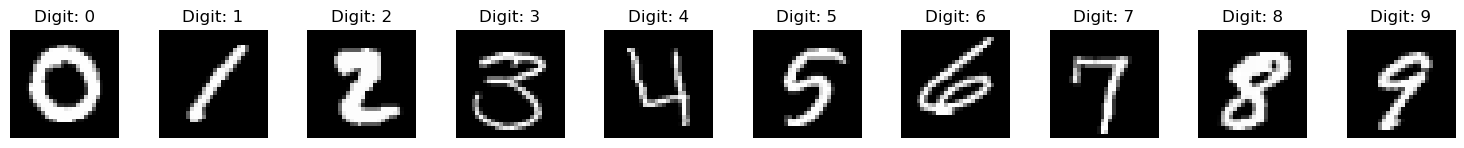

In [9]:
mnist_data = load_data('../data/data_mnist.csv')
display_sample_per_class(mnist_data)

In [10]:
X = mnist_data.iloc[:, 1:]  # all rows, all columns except the first column (pixel values)
y = mnist_data.iloc[:, 0]   # all rows, only the first column (label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

>**Exercise 2-3:** Your goal for this exercise is to try to find the optimal k value for a kNN classifier on the MNIST dataset. Perform the following steps to find out.
>1. Use the KNeighborsClassifier from sklearn.neighbors and write and excute a helper function that will plot the loss defined as plot_knn_loss which takes X_train, y_train, X_test, y_test, and max_k as parameters. Initialize an empty list to store error rates for each k.
>2. Iterate Over Range of k Values using a loop to iterate from k = 1 to k = max_k. For each k, instantiate a KNeighborsClassifier with the current k. Train the classifier using X_train and y_train. Calculate the error rate (proportion of incorrect predictions) and append it to the error rates list.
>3. Plotting the Results: Use Matplotlib to plot the range of k values against the error rates. Label your axes appropriately (e.g., "Number of Neighbors k" and "Error Rate"). Add a title and a grid for better readability.


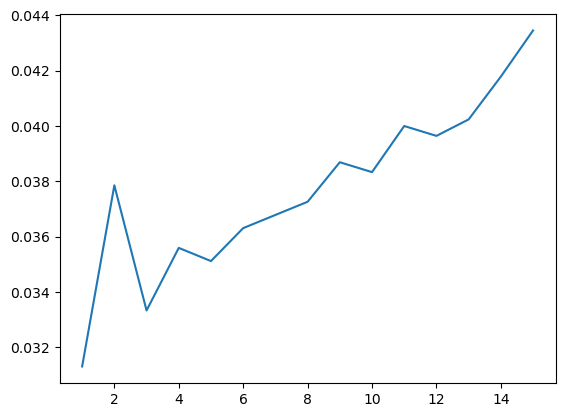

In [11]:
from sklearn.neighbors import KNeighborsClassifier

max_k = 15

## Put your code below
def plot_knn_loss(X_train, y_train, X_test, y_test, max_k):
    X_train = np.ascontiguousarray(X_train)
    X_test = np.ascontiguousarray(X_test)
    loss = []
    num_neighbors = []
    for i in range (1, max_k+1):
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train, y_train)

        loss.append(1-model.score(X_test, y_test))
        num_neighbors.append(i)
        
    plt.plot(num_neighbors, loss)
    plt.show()

plot_knn_loss(X_train, y_train, X_test, y_test, max_k)


> Given these results, is it clear where the optimal $k$ value is? 

> Answer:
For some reason, the best k value seems to be 1.

>**Exercise 2-4:** Using your optimal $k$ value from Exercise 2-1, retrain the kNN classifier on the MNIST dataset. Create and execute code to construct and visualize the confusion matrix. 

In [12]:
## Put your code below
from sklearn.metrics import confusion_matrix

X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))

[[810   0   0   0   0   0   3   0   1   2]
 [  0 908   0   0   1   0   0   0   0   0]
 [  6   7 806   3   3   2   2  14   1   2]
 [  0   2   4 900   0  13   0   6   8   4]
 [  1   3   0   0 811   0   3   3   0  18]
 [  0   0   0   9   1 674   9   1   4   4]
 [  5   0   0   0   0   2 777   0   1   0]
 [  0  10   4   1   2   0   0 862   0  14]
 [  1   7   7  10   1  11   2   2 785   9]
 [  2   2   0   6  10   1   0  13   0 804]]


> Given these results, do you notice any particular digits that are more frequently confused with each other? Does this match with your intuition? <br>
Yes, certain digits like 9 and 4 are confused with each other more often than others. I can understand why, given bad handwriting, they might be confused.

# Linear models; the workhorse of statistics
 

## Introduction

The concept of the linear model is the basis of many statistical and machine learning models. Further, an understanding of linear models is a good basis for understanding many other types of statistical and machine learning models.   

In this assignment we will focus on regression models, but the lessons drawn from this discussion can be applied to many other types of models. By developing an understanding of linear regression, you are building a foundation to understand many other machine learning models. Nearly all machine learning methods suffer from the same problems, including over-fitting and mathematically unstable fitting methods. Understanding these problems in the linear regression context will help you work with other machine learning models.     

The method of regression is one of the oldest and most widely used analytics methods. The goal of regression is to produce a model that represents the **best fit** to some observed data. Typically the model is a function describing some type of curve (lines, parabolas, etc.) that is determined by a set of parameters (e.g., slope and intercept). *Best fit* means that there is an optimal set of parameters which minimize an error criteria we choose.     

Many machine learning models, including some of the latest deep learning methods, are a form of regression. **Linear regression** is the foundational form of regression. Linear regression minimizes squared error of the predictions of the dependent variable using the values of the independent variables. This approach is know as the **method of least squares**.   

Regression models attempt to predict the value of one **dependent variable** using the information from other **independent variables**. Unfortunately, the terminology used for these variables is not consistent across authors, statistical software packages, and application domains. The table below list some, but by no means all of the terms used for these variables. 

### Confusing terminology 

Given that linear models have been developed in many areas for a long period of times, different terminology has developed for the same things. For people trying to learn the subject this differing terminology is confusing and seemingly conflicting.    

The main division in terminology arises from different communities within statistics and machine learning. The table below shows some of the different terms commonly used in the two lineages:       

| Machine Learning Terminology | Statistical Terminology          |
|:---------------------------|:------------------------------|
| Regression vs classification   | Continuous numeric vs categorical response      |
| Learning algorithm or model    | Model                                |
| Features                       | Predictor, explanatory, exogenous, or independent variables   |
| Training                       | Fitting                              |
| Trained model                  | Fitted model                         |
| Supervised learning            | Predictive modeling      

For the specific case of regression there are further differences in terminology. These arise not just between the statistical and machine learning communities. One difference in terminology is the naming of the variables used in regression and other machine learning models. The table below outlines some of these differences:          

Predicted Variable | Variables Used to Predict    
:----------------------- | :------------------------------     
 y | x   
 Dependent | Independent    
 Endogenous | Exogenous    
 Response | Predictor    
 Response | Explanatory    
 Label | Feature    
 Regressand | Regressors    
 Outcome | Design   
 Left Hand Side | Right Hand Side     
 

## History

Regression is based on the method of least squares or the method of minimum mean square error. The idea of averaging errors have been applied for nearly three centuries. The first known publication of a *method of averages* was by the German astronomer Tobias Mayer in 1750. Lapace used a similar method which he published in 1788.

<img src="../images/TobiasMayer.jpg" alt="TobiasMayer" style="width: 200px;"/>
<center>Credit wikipedia commons</center>

The first publication of the **method or least squares** was by the French mathematician Adrien-Marie Legendre in 1805. Legendre was a brilliant mathematician, known for his unpleasant personality.  

![](../images/Legendre.jpg)
<center>Caricature of Legendre, published method of least squares: credit Wikipedia commons</center>

It is very likely that the German physicist and mathematician Gauss developed the method of least squares as early as 1795, but did not publish the method until 1809, aside from a reference in a letter in 1799. Gauss never disputed Legendre's priority in publication. Legendre did not return the favor, and opposed any notion that Gauss had used the method earlier. 

![](../images/Carl_Friedrich_Gauss.jpg)
<center>Carl Friedrich Gauss, early adopter of the least squares method: credit Wikipedia commons</center>

The first use of the term **regression** was by Francis Gaulton, a cousin of Charles Darwin, in 1886. Gaulton was interested in determining which traits of plants and animals, including humans, could be said to be inherited. Gaulton used the term **regression to the mean** to describe the natural processes he observed in inherited traits.  

<img src="../images/Francis_Galton.jpg" alt="Drawing" style="width:225px; height:250px"/>
<center>Francis Galton, inventor of regression: credit Wikipedia commons</center>

While Gaulton invented a form regression, it fell to Karl Pearson to put regression and multiple regression on a firm mathematical footing. Pearson's 1898 publication proposed a method of regression as we understand it today. 

Many others have expanded the theory of regression in the 120 years since Pearson's paper. Notably, Joseph Berkson published the logistic regression method in 1944, one of the first classification algorithms. In recent times, the interest in machine learning has lead to a rapid increase in the variety of regression models. 

## Introduction to Theory of Linear Regression

We will focus on the theory of **linear models**, which are foundational. Key properties of linear models include:
- Derived with linear algebra.
- Include any model **linear in coefficients**, including polynomials, splines, Gaussian kernels and many other nonlinear functions.    
- Understanding linear models is basis for understanding behavior of many other statistical or machine learning models.
- Linear models are the basis of many time series and survival models.



### Linear model of a strait line

Let's have a look at the simple case of a regression model for a straight line. For this example we will work with single regression with one feature and one label. The data are in the form of some number of values pairs, $\{x_i,y_i \}$. 

The goal of this regression model is to find a straight line that best fits the observed data. We can define the line by two coefficients or **parameters**, the **slope** and the **intercept**. A general representation of this parameterization of a straight line is illustrated in the figure below.

<img src="../images/ymxb.jpg" alt="y_equals_mx_plus_b" style="width: 450px;"/>
<center>**Single regression model: credit wikipedia commons**</center>

Where,  

\begin{align}
m &= slope = \frac{rise}{run} = \frac{\delta y}{\delta x}\\
and\\
y &= b\ at\ x = 0
\end{align}


For each of the pairs of observed values, ${x_i,y_i}$, we can write the equation for the line with the errors as:

\begin{align}
y_i &= mx_i + b + \epsilon_i \\
where \\
\epsilon_i &= error
\end{align}

We can visualize these errors as shown in the figure below.

<img src="../images/LSRegression.jpg" alt="LSRegression" style="width: 450px;"/>
<center>Example of least squares regression with errors shown as vertical lines: credit wikipedia commons</center>

Notice that these errors are only along the y-axis. In other words, the **linear regression model accounts for errors in the predicted value**, not errors in the values of the independent values. We want to solve for $m$ and $b$ by minimizing these errors, $\sum_i \epsilon_i$. This leads us to the  **least squares regression** problem.

$$min \Sigma_i \epsilon^2 = min \Sigma_i{ (y_i - (mx_i + b))^2}$$

One can see the equivalence to the Normal log-likelihood:   

$$l(\mathbf{X}\ |\ \mu, \sigma ) = - \frac{n}{2} log( 2 \pi \sigma^2 ) - \frac{1}{2 \sigma^2} \sum_{j=1}^n (x_j - \mu)^2$$

For a fixed variance, $\sigma^2$, the log-likelihood is maximized when the least square error condition in met. This observation has two important implications:   
1. The error, or **residuals**, arising from a least squares model are expected to be Normally distributed.   
2. There are computationally efficient algorithms for finding minimums of equations. 

## Linear regression assumptions

Before going any further, we should discuss a few key assumptions of linear regression, also known as **ordianary least squares (OLS)**. Keep these points in mind whenever you use a regression model. 

1. There is a **linear relationship** between dependent variable and the **coefficients** of the independent variables. This does not mean the function approximation used must be linear. Only that the model must be linear in the coefficients. 
2. Measurement error is independent and random. Technically, we say that the error is **independent identical distributed, or iid**.
3. Errors arise from the dependent variable only. Other models, such as complete regression, must be used if there are errors in the independent variable. 
The diagram below illustrates the iid errors for the dependent variable only.

![](../images/IndependentErrors.jpg)
<center>Credit wikipedia commons</center>

4. There is no **multicolinearity** between the features or independent variables. In other words, there is no significant correlation between the features.
5. The **residuals** are independent identically distributed (iid) Normal and **homoscedastic** (constant variance).  In other words, the errors are the same across all values of the independent variables. We will explore this fundamental property further.

## A First Regression Model

Let's give regression a try. The code in the cell below computes data pairs along a straight line. Normally distributed noise is added to the data values. Run this code and examine the head of the data frame.

In [13]:
import numpy as np
import numpy.random as nr
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot, plot_regress_exog
from sklearn.preprocessing import normalize, StandardScaler
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
%matplotlib inline

# Paramters of generated data
n_points = 50
x_start, x_end = 0, 10
y_start, y_end = 0, 10
y_sd = 1

# Generate data columns
nr.seed(5666)
x_data = np.linspace(x_start, x_end, n_points) # The x values
y_error = np.random.normal(loc=0, scale=y_sd, size=n_points) # The Normally distributed noise
y_data = np.linspace(y_start, y_end, n_points) + y_error + 1.0 # The y values including an intercept

# Put data in dataframe
sim_data = pd.DataFrame({'x':x_data, 'y':y_data})

sim_data.head()

,x,y
0,0.000000,1.475868
1,0.204082,0.915564
2,0.408163,2.216802
3,0.612245,1.362557
4,0.816327,3.521151


Next, you can visualize these data by executing the code in the cell below. Notice that the points nearly fall on a straight line.

(0.0, 11.0)

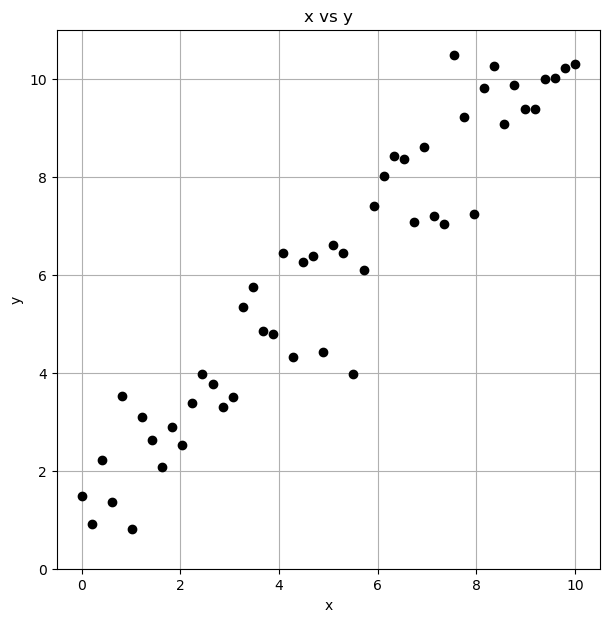

In [14]:
# Matplotlib may give some font errors when loading for the first time, you can ignore these
fig,ax = plt.subplots(figsize=(7,7))
ax.plot(sim_data['x'], sim_data['y'], 'ko')
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('x vs y')
ax.set_ylim(0,11)

### Centering explanatory variable

We want to be in a position to interpret the results of the linear model. The problem is the intercept term. By definition, the intercept is the crossing point of the regression line on the y-axis (dependent) variable. The independent variables must all have values of 0, at the intercept. However, this intercept value is often quite arbitrary and meaningless in terms of the values of the independent (predictor) variables. In fact, the independent variables may not reasonably ever have values of 0.  As an example, the intercept can have impossible values, such as a negative life expectancy.     

The solution is to **center** the independent variables. Centering these variables transforms the intercept term to the **mean of the response variable**. This practice eliminates the aforementioned problems by ensuring the intercept point is in a reasonable range of the independent variables.       

> ***Note:** It is standard practice to transform independent variables to be both zero mean (centered) and unit variance. This treatment can be essential if the scale of multiple independent variables is quite different. If variance standardization is not applied in such cases, variables with a large range of numeric values can dominate the model training. Rather, we want variables with the best explanatory power to dominate model training regardless of the range of values. For single (independent variable) regression, scalling is not necessary. See the section below of scaling data for more detail. 

Execute the code in the cell below to compute a centered independent variable.   

In [15]:
sim_data['x_centered'] = np.subtract(sim_data.loc[:,'x'], np.mean(sim_data.loc[:,'x']))

###  Fitting a Linear Regression Model

Now, you are ready to build and evaluate a regression model using Python. There are a number of Python libraries that contain linear modeling capabilities.

The [scikit-learn](https://scikit-learn.org/stable/) package has many different types of machine learning algorithms. Scikit-lean model interfaces take a machine learning perspective. The data arguments for Scikit-learn models are numpy arrays which must be dimensioned properly.

[Statsmodels](https://www.statsmodels.org/stable/index.html) is another Python package with extensive linear model capability. This package takes a statistical perspective, which we adopt here. A nice feature of statsmodels is that the data argument is a Pandas data frame. 

You can specify statsmodels models using the [R-style model language](https://www.statsmodels.org/devel/example_formulas.html). If you are not familiar with the R model language interface, read the summary below before proceeding. For those that have experience with the R programming language, statsmodels will seem familiar since it provides a R-like model language interface.

> **R-Style Model Formulas**    
> The code in the cell below uses an R style model formula. This modeling language was introduced in [Chambers and Hastie, 1992, Statistical Models in S](https://www.taylorfrancis.com/books/e/9780203738535).     
>
> In statsmodels there is a specific implementation of the R formula language, documented [here](https://www.statsmodels.org/stable/examples/notebooks/generated/formulas.html). For a good [**cheatsheet and summary of the R modeling language**](http://faculty.chicagobooth.edu/richard.hahn/teaching/formulanotation.pdf) look at the posting by Richard Hahn of the Chicago Booth School.    
>
> Models are defined by an equation using the $\sim$ symbol, meaning *modeled by*. The variable to be modeled is always on the left. The relationship between the independent variables shown on the right. This basic scheme can be written: 
$$dependent\ variable\sim indepenent\ variables$$
> For example, if the dependent variable (dv) is modeled by two independent variables (var1 and var2), with no interaction, the formula is:
$$dv \sim var1 + var2$$
> - Example; dependent variable (dv) is modeled by independent variables (var1) and its square. The $I()$ operator is used to wrap a function of a variable:
$$dv \sim var1 + I(var1**2)$$
> - Example; dependent variable (dv) is modeled by two independent variables (var1 and var2) and the **interaction term** between them:
$$dv \sim  var1*var2$$
> The expansion of this notation is: 
\begin{align}
var1:var &= 1 + var1 + var 2 + var1:var2\\
var1*var &= intercept + sum\ of\ variables + interaction\ of\ variables
\end{align}
> - Example; dependent variable (dv) modeled by independent numeric variable (var1) and a categorical variable (var2) using the $C()$ operator to encode the levels of the categorical variable:
$$dv \sim var1 + C(var2)$$
> - Example of using $-$ operation to drop terms in from the model. In this case both intercept is dropped by the $-1$ term and the independent $var2$ term is dropped:    
\begin{align}
dv &\sim  -1 - var2 + var1*var2\\
dv &\sim no\ intercept + var1 + interaction\ of\ variables
\end{align}

In our case, there is only one independent variable and one dependent variable. The code in the cell below does the following:  

- The model formula is specified as $y \sim x$.
- An [statsmodels.formula.api.ols (ordinary least squares)](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html?highlight=statsmodels%20formula%20ols#statsmodels.formula.api.ols) model object is specified using the model formula and the data frame. Here, we use the lower case *ols* function so that the model language can be specified in the call. 
- The *fit* method is applied to the ols object. 
- The slope and intercept point estimates are printed. 

Execute this code and note the coefficient values.

In [16]:
## Define the regresson model and fit it to the data
ols_model = smf.ols(formula = 'y ~ x_centered', data=sim_data).fit()

## Print the model coefficient
print('Intercept = {0:4.3f}  Slope = {1:4.3f}'.format(ols_model._results.params[0], ols_model._results.params[1]))

Intercept = 6.011  Slope = 0.941


The intercept and slope are close to the actual values of 1.0 and 1.0. However, we need a more thorough examination of the results before we can say this is a good model for these data.  

As a first step toward evaluating this model, we can compute the predicted values of y given the values of x. Execute the code in the cell below which uses the *predict* method to compute these predicted values. 

In [17]:
# Add predicted to pandas dataframe
sim_data['predicted'] = ols_model.predict(sim_data.x_centered)
# View head of data frame
sim_data.head(10)

,x,y,x_centered,predicted
0,0.000000,1.475868,-5.000000,1.305594
1,0.204082,0.915564,-4.795918,1.497657
2,0.408163,2.216802,-4.591837,1.689720
3,0.612245,1.362557,-4.387755,1.881783
4,0.816327,3.521151,-4.183673,2.073846
5,1.020408,0.818881,-3.979592,2.265908
6,1.224490,3.096915,-3.775510,2.457971
7,1.428571,2.631663,-3.571429,2.650034
8,1.632653,2.074532,-3.367347,2.842097
9,1.836735,2.897740,-3.163265,3.034160


For a single regression model, we can plot the values of the predicted line along with the actual data values on a 2-dimensional plot. For models with multiple features, [partial regression plots](https://en.wikipedia.org/wiki/Partial_regression_plot) can be created. 

Execute the code in the cell below to create the plot and examine the results. 

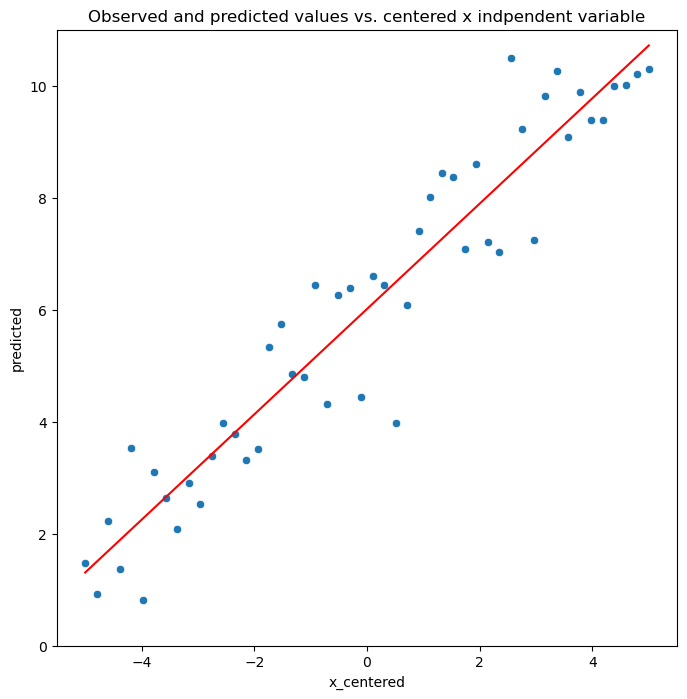

In [18]:
fig,ax = plt.subplots(figsize=(8,8))
ax = sns.lineplot(x='x_centered', y='predicted', data=sim_data, color='red')
sns.scatterplot(x='x_centered', y='y', data=sim_data, ax=ax)
ax.set_title('Observed and predicted values vs. centered x indpendent variable')
_=ax.set_ylim(0,11)

So far, so good. The predicted regression line does seem to fit the data well. But, how can we quantify the performance of this model? 

## Interpreting the Model Parameters    

How can we interpret the model parameters? First, recall that the model is linear and constructed using a zero-centered independent variable. The result is both simple and intuitive:    
- The intercept of about 6.0 is the **mean** of the response variable y.    
- The slope coefficient of 0.94 indicates that the response variable increases by 0.94 for each unit of increase of the independent variable.   

## Evaluation of regression models

Now that you have built a regression model, let's look at how you can quantitatively evaluate the performance of a regression model. There is no one metric that can be used to evaluate a linear model, or any other type of machine learning model. Here as in any other case, we will in fact use multiple metrics to evaluate the linear regression model. 

The evaluation of regression models is based on measurements of the errors. The errors of a regression model can be visualized as shown in the figure below. 

<img src="../images/Errors.jpg" alt="Regression_Errors" style="width: 450px;"/>
<center>Measuring errors for a regression model: credit, Wikipedia commons</center>  
    
    
Let's start with the observed values of the feature, $X$, and label, $Y$.      

\begin{align}
X &= [x_1, x_2, \ldots, x_n]\\
Y &= [y_1, y_2, \ldots, y_n]\\
where\\
x_i &= ith\ feature\ value\\
y_i &= ith\ label\ value\\
\end{align}

The results of the regression model are **estimates** which we write:   

\begin{align}
\bar{Y} &= mean(Y)\\
\hat{y_i} &= regression\ estimate\ of\ y_i
\end{align}  

Given the above we can define the follow **sum of squares** relationships:   

\begin{align}
SSE &= sum\ square\ explained\ = \Sigma_i{(\hat{y_i} - \bar{Y})^2}\\
SSR &= sum\ square\ residual\ = \Sigma_i{(y_i - \hat{y_i})^2}\\
SST &= sum\ square\ total\ = \Sigma_i(y_i - \bar{Y})^2 \\
SST &= SSR + SSE
\end{align}

### $R^2$: variance explained

The goal of regression is to minimize the residual error, $SSR$. In other words, when fitting the model we wish to explain the maximum amount of the variance in the original data. We can quantify the **faction of squared error explained** with the **coefficient of determination** also known as $R^2$. We can express $R^2$ as follows:

$$R^2 = 1 - \frac{SSR}{SST}$$

The $R^2$ for a perfect model would behave as follows:   

\begin{align}
SSR &\rightarrow 0\\
which\ leads\ to \\
R^2 &\rightarrow 1
\end{align}

In words, a model which perfectly explains the data has $R^2 = 1$. For a model which does not explain the data at all we can write: 

\begin{align}
SSR &= SST \\ 
and \\ 
R^2 &= 0
\end{align}


However, there are two problems with $R^2$. </center>
 - $R^2$ is not bias adjusted for degrees of freedom.
 - More importantly, there is no adjustment for the number of model parameters. As the number of model parameters increases $SSR$ will generally decrease. Without an adjustment you will get a false sense of model performance.    
 
To addresses these related issues, we use **adjusted $R^2$**.

\begin{align}
R^2_{adj} &= 1 - \frac{\frac{SSR}{df_{SSR}}}{\frac{SST}{df_{SST}}} = 1 - \frac{var_{residual}}{var_{total}}\\
where\\
df_{SSR} &= SSR\ degrees\ of\ freedom\\ 
df_{SST} &= SST\ degrees\ of\ freedom
\end{align}

This gives $R^2_{adj}$ as:

\begin{align}
R^2_{adj} &= 1 - (1 - R^2) \frac{n - 1}{n - k}\\ 
where\\
n &= number\ of\ data\ samples\\
k &= number\ of\ model\ coefficients
\end{align}

Or, we can rewrite $R^2_{adj}$ as:

$$R^2_{adj} =  1.0 - \frac{SSR}{SST}  \frac{n - 1}{n - 1 - k}$$



### F test on variance explained        

Adjusted $R^2$ is one approach to comparing the variance reduction of a regression model. Another approach is to perform an hypothesis test. For this, we can use the F-test, a test on the ratio of variances. For a model with $k$ model parameters, fitted with $n$ observations. We can compute the F statistic as:     

$$F = \frac{Var_{between}}{Var_{within}} = \frac{SS_{between}/bdof}{SS_{within}/wdof} \\
where\\   
bdof = k-1 \\
wdof = n - k
$$      

The F-test on the significance of the F statistic determines the significance of the regression model. A large value of the F-statistic indicates a low probability that the reduction in variance is from random sampling alone.

### Example of model summary

You can see an extensive summary of the fit of the linear model with the *summary* method. Execute the code in the cell below and examine the output. 

In [19]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     469.5
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           1.97e-26
Time:                        13:48:15   Log-Likelihood:                -64.907
No. Observations:                  50   AIC:                             133.8
Df Residuals:                      48   BIC:                             137.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0111      0.128     46.993      0.000       5.754       6.268
x_centered     0.9411      0.043     21.668      0.000       0.854       1.028
==============================================================================
Omnibus:                        0.850   Durbin-Watson:                   2.312
Prob(Omnibus):                  0.654   Jarque-Bera (JB):                0.450
Skew:                          -0.228   Prob(JB):                        0.799
Kurtosis:                       3.091   Cond. No.                         2.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The summary table gives us a lot of information about the fit of this model. Let's examine some of these values.   

- Starting with the **model coefficients**, the report includes an hypothesis test on the statistical significance of the model coefficients. In this case we can interpret this significance as follows: For both the **intercept** and **slope** the t-statistic is large, p-value is small, and the confidence interval does not include zero. These coefficients are statistically significant.
- The **F-statistic** and **Prob (F-statistic)** are a measure of the significance of the model against a **null model that does not explain the data**. In this case the large F-statistic and small probability indicate that we can reject this null hypothesis and say the model is significant in terms of explaining the data.  
- The **Omnibus statistic** is used in Statsmodels as a test of Normallity. In general, the omnibus statistic is a variance ratio test, with a $\chi^2$ distributed statistic. In this case, the null hypothesis is that the residuals are Normally distributed. If the residuals have a significantly different distribution from the Normal, the hypothesis of Normallity can be rejected. *Note, the use of an omnibus statistic in Statsmodels is, unlike other statistical software packages. More typically, the omnibus statistic is a variance ratio test between the model and a null model.*     
- The $R^2$ value is shown in the upper right corner. The value of 0.91 indicates a relatively good model fit.   
- The **adjusted $R^2$** shown in the summary indicates that the model is a good fit. To find this quantity, notice the following: 
  - The **number of observations** and is the $df_{SST}$. 
  - The **degrees of freedom residuals** is the $df_{SSR}$. 
  - Notice that $df_{SST} - df_{SSR} =$ number of model coefficients. 
- The [**Jarque-Bera**](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test) statistic is a test on the skewness and krutosis of the residuals. Given the large probability (p-value) we cannot reject the null hypothesis that the residuals have significant skewness and krutosis. 
- The **condition number** is a measure of how well defined the solution is to the system of linear equations solved. A low conditon number ($C \lt 100$) is generally considered ideal.  
  
> **Warning:** The hypothesis tests on model coefficients suffer from the same problems of any hypothesis test. These problems are especially prevalent when the are large numbers of model parameters. For example, finding coefficients significant that are not, or vice versa is not uncommon. This situation can be aggravated when features have significant colinearity (correlation). 

## Analysis of Residuals

There is one more important topic in evaluating regression models, the analysis of the **residuals**. The residuals of a regression model are the difference between the predicted values and actual values of the label. In other words, the residuals are the error term we write as $\epsilon_i$ for the ith observation.

A good linear regression model should have residuals with the following properties: 

1. The residuals should be approximately **Normally distributed with zero mean**. This criteria applied to any regression model using a least squares loss function. The least squares fitting criteria is only optimal for Normally distributed and zero mean residuals. We can express this important relationship mathematically as:  

\begin{align}
y_i &=  mx_i + b + \epsilon_i \\
where, \\
\epsilon_i &= N(0, \sigma)
\end{align}

2. The residuals should be **homoscedastic** with respect to the predicted values, $\hat{Y}$. Homoscedastic residuals have constant variance, $\sigma$ with respect to the predicted values. This criteria applies to any form of regression model. If this is not the case, we say that the residuals are **heteroscedastic**, with variance changing with respect to the predicted values. In other words, the variance is a function of the predicted values, $\sigma(x_i) = f(x_i)$. A model with heteroscedastic residuals will have a better fit for small predicted values than large predicted values, or vice versa. We can write a model for hetroscedastic residuals as: 

$$\epsilon_i = N(0, f(x_i))$$

As an example, consider a situation where the variance of the residuals grows exponentially with the value of the predictor.    
$$\epsilon_i = N(0, e^{x_i})$$    

In this case, the residuals will be strongly heteroscedastic. This outcome should alert any modeler to the fact that a better model is required. A logarithmic transformation of the variable is one possibility here. 

To start our analysis of residuals, execute the code in the cell below to compute residuals for the model. 

In [20]:
# Add residuals to pandas dataframe
sim_data['resids'] = np.subtract(sim_data.predicted, sim_data.y)

# View head of data frame
sim_data.head(10)

,x,y,x_centered,predicted,resids
0,0.000000,1.475868,-5.000000,1.305594,-0.170274
1,0.204082,0.915564,-4.795918,1.497657,0.582093
2,0.408163,2.216802,-4.591837,1.689720,-0.527082
3,0.612245,1.362557,-4.387755,1.881783,0.519226
4,0.816327,3.521151,-4.183673,2.073846,-1.447306
5,1.020408,0.818881,-3.979592,2.265908,1.447027
6,1.224490,3.096915,-3.775510,2.457971,-0.638943
7,1.428571,2.631663,-3.571429,2.650034,0.018371
8,1.632653,2.074532,-3.367347,2.842097,0.767565
9,1.836735,2.897740,-3.163265,3.034160,0.136420


We can measure the dispersion of the residuals as a measure of regression performance. The metric is root mean square error or RMSE, which is very close to the standard deviation:

$$RMSE = \sqrt{\frac{ \Sigma^n_{i-1} (y_i - \hat{y_i})^2}{n}}= \sqrt{\frac{SSR}{n}}$$

Since the residuals should be distributed as $N(0, \sigma)$, we should also determine if the mean of the residuals is approximately 0. 

Execute the code in the cell below to compute and display the mean and RMSE for the model. 

In [21]:
print('The mean of the residuals = {0:4.3f}  RMSE = {1:4.3f}'.format(np.mean(sim_data.resids), np.std(sim_data.resids)))

The mean of the residuals = 0.000  RMSE = 0.886


This is a reasonable value for RMSE considering the scale of the lable, $\{0,11\}$. Further, the mean of the residuals is effectively 0 as required by our model. 

Next, we need to determine if the distribution of the residuals is approximately Normal. Execute the code in the cell below to plot a histogram and Q-Q Normal plot of the residuals. 

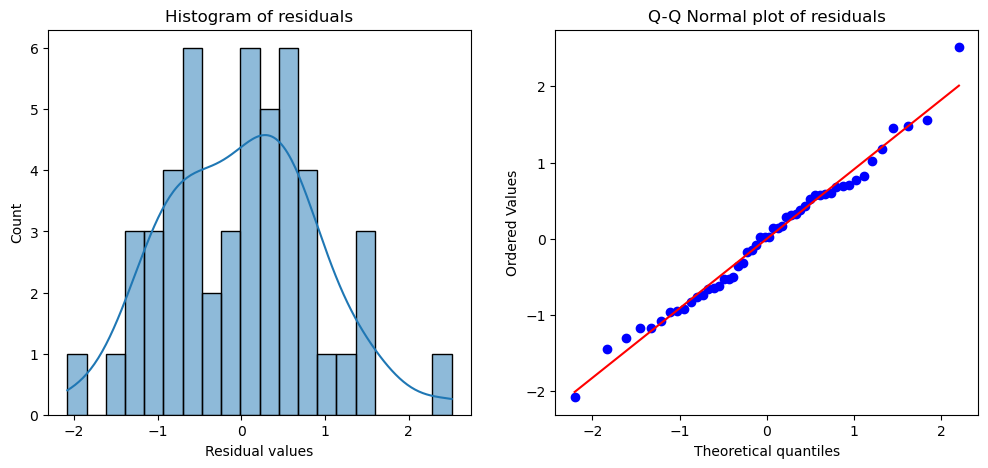

In [22]:
def plot_resid_dist(resids):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    ## Plot a histogram
    sns.histplot(resids, bins=20, kde=True, ax=ax[0])
    ax[0].set_title('Histogram of residuals')
    ax[0].set_xlabel('Residual values')
    ## Plot the Q-Q Normal plot
    ss.probplot(resids, plot = ax[1])
    ax[1].set_title('Q-Q Normal plot of residuals')
    plt.show()

plot_resid_dist(sim_data.resids)

The residuals are reasonably close to Normally distributed.   

Now, we must explore if the residuals are homoscedastic. A robust diagnostic for homoscedasticy is to create a **residual plot** with the residuals on the vertical axis plotted against the predicted values on the horizontal axis. Execute the code in the cell below to display an example.     

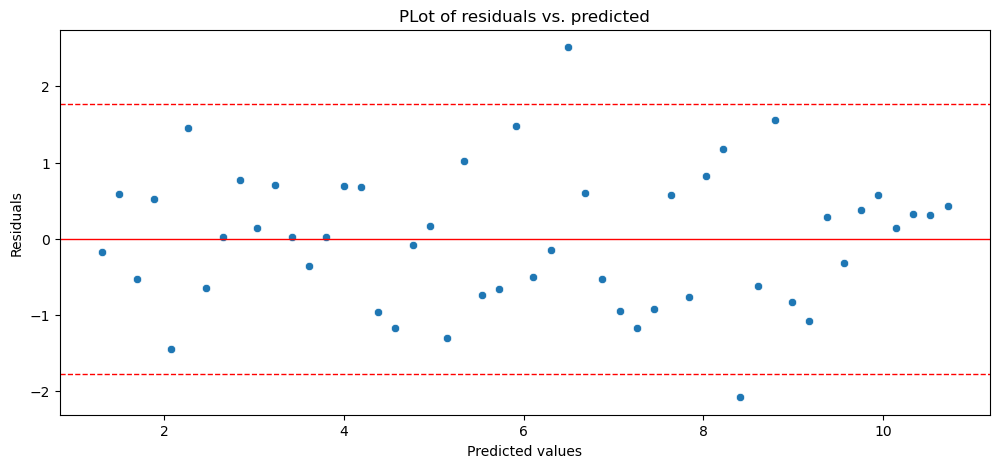

In [23]:
def residual_plot(df, predicted='predicted', resids='resids'):
    fig,ax = plt.subplots(figsize=(12,5))
    RMSE = np.std(df.loc[:,resids])
    sns.scatterplot(x=predicted, y=resids, data=df, ax=ax)
    ax.axhline(0.0, color='red', linewidth=1.0)
    ax.axhline(2.0*RMSE, color='red', linestyle='dashed', linewidth=1.0)
    ax.axhline(-2.0*RMSE, color='red', linestyle='dashed', linewidth=1.0)
    ax.set_title('PLot of residuals vs. predicted')
    ax.set_xlabel('Predicted values')
    ax.set_ylabel('Residuals')
    plt.show()
    
residual_plot(sim_data)  

These residuals look quite homoscedastic. In summary, the fit of the linear model looks quite good. 

> **Exercise 2-5:** You will now construct a single regression model for the price of automobiles given the weight. Using statistical terminology we can stay we want to model the dependent variable, price, by the independent variable, or explanatory variable, weight. Now, follow these steps:   
> 1. Execute the code in the cell below to load the required dataset and center (zero mean) the independent variables you will work with.    

In [24]:
auto_price = pd.read_csv('../data//AutoPricesClean.csv')
for col,new_col in zip(['curb_weight','engine_size'],['curb_weight_centered','engine_size_centered']):
    auto_price[new_col] = auto_price.loc[:,col] - np.mean(auto_price.loc[:,col])

> 2. Next, in the cell below create and execute the code to define and fit the OLS model and print the summary. Use a formula `'price ~ curb_weight_centered'`. Name your model `auto_ols`.  
> 3. Print the summary of the model.  

In [25]:
## Put your code below
auto_ols = smf.ols(formula = 'price ~ curb_weight_centered', data=auto_price).fit()
auto_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     447.0
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           3.93e-52
Time:                        13:48:15   Log-Likelihood:                -1913.2
No. Observations:                 195   AIC:                             3830.
Df Residuals:                     193   BIC:                             3837.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.325e+04    317.634     41.708      0.000    1.26e+04    1.39e+04
curb_weight_centered    12.8315      0.607     21.143      0.000      11.635      14.029
==============================================================================
Omnibus:                       85.021   Durbin-Watson:                   0.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              392.247
Skew:                           1.648   Prob(JB):                     6.68e-86
Kurtosis:                       9.116   Cond. No.                         523.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> 4. Next, you will examine the statistical properties, distribution and homoscedacity of the residuals as following:      
>  - Print the mean and the root mean square of the residuals.     
>  - Plot the histogram and QQ-Normal plot of the residuals.   
>  - Create a residual plot of the residuals vs. the predicted values

The mean of the residuals = -0.000  RMSE = 4412.707


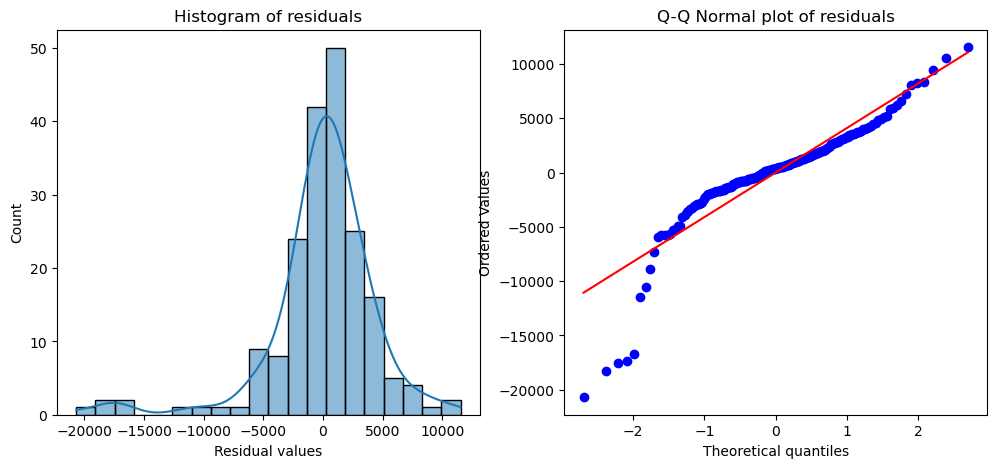

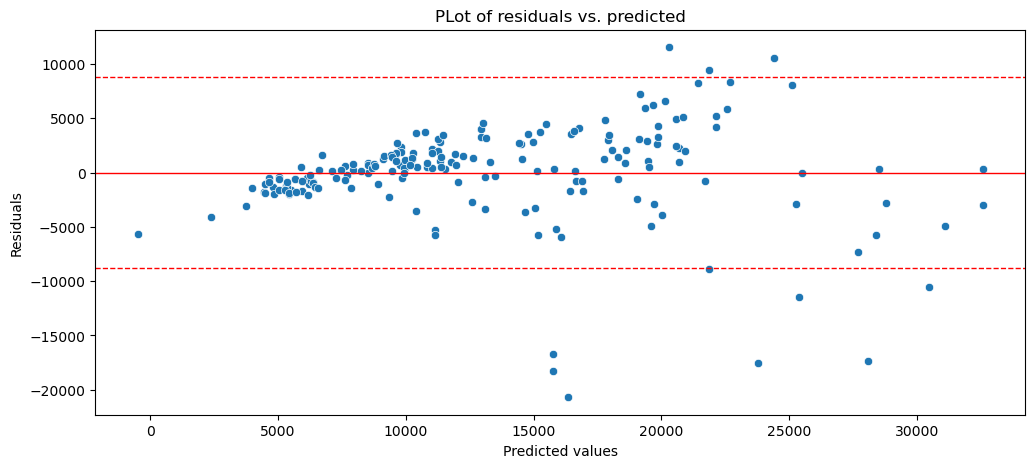

In [26]:
auto_price['predicted'] = auto_ols.predict(auto_price.curb_weight_centered)
auto_price['resids'] = np.subtract(auto_price.predicted, auto_price.price)

## Your code below
print('The mean of the residuals = {0:4.3f}  RMSE = {1:4.3f}'.format(np.mean(auto_price.resids), np.std(auto_price.resids)))
plot_resid_dist(auto_price.resids)
residual_plot(auto_price)  

> Now answer these questions:      
> 1. Are the residuals 0 centered and what does this tell you about the model?       
> 2. Are these residuals Normally distributed and if not what does this tell you about the model?    
> 3. Are the residuals homoscedastic or heteroscedastic and why do you reach this conclusion?      
> 4. Considering the adjusted R squared, the F statistic and the Omnibus statistic, does this model have explainatry power.

> 1. The residuals are 0 centered, as required by our model.
> 2. The Q-Q normal plot shows that the residuals are close to normal, but have a heavy tail on the left. This means that they aren't quite normally distributed and our model might not be great.
> 3. From the residuals vs. predicted plot I can tell that the data seems heteroscedastic. This is because the variance is not constant, increasing as the values increase.
> 4. The F statistic is high, which means that we can reject the null hypothesis and that our model has explanatory power. The adjusted R squared is pretty low, which means that our model's fit isn't good. The Omnibus statistic is high, indicating that our data isn't normal.

> **Exercise 2-6:** You might be able to improve the model by a transformation of the response variable. To find out, do the following:       
> 1. Using the formula `'np.log(price) ~ curb_weight_centered` compute a new model, named `auto_ols_log`.  
> 2. Print the summary of the model.  

In [27]:
## Put your code below
auto_ols_log = smf.ols(formula = 'np.log(price) ~ curb_weight_centered', data=auto_price).fit()
auto_ols_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     774.5
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           1.76e-69
Time:                        13:48:16   Log-Likelihood:                 12.680
No. Observations:                 195   AIC:                            -21.36
Df Residuals:                     193   BIC:                            -14.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                9.3496      0.016    572.862      0.000       9.317       9.382
curb_weight_centered     0.0009   3.12e-05     27.830      0.000       0.001       0.001
==============================================================================
Omnibus:                       45.771   Durbin-Watson:                   0.651
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.961
Skew:                           0.953   Prob(JB):                     8.14e-30
Kurtosis:                       6.586   Cond. No.                         523.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> 3. Next, you will examine the statistical properties, distribution and homoscedacity of the residuals of the new model as following:  
>  - Compute the predicted values from the model and place them in a column in the data frame.    
>  - Using the predicted values, compute the residuals and place them in a column in the data frame. 
>  - Print the mean and the root mean square of the residuals.     
>  - Plot the histogram and QQ-Normal plot of the residuals.   
>  - Create a residual plot of the residuals vs. the predicted values.  

The mean of the residuals = 0.000  RMSE = 0.227


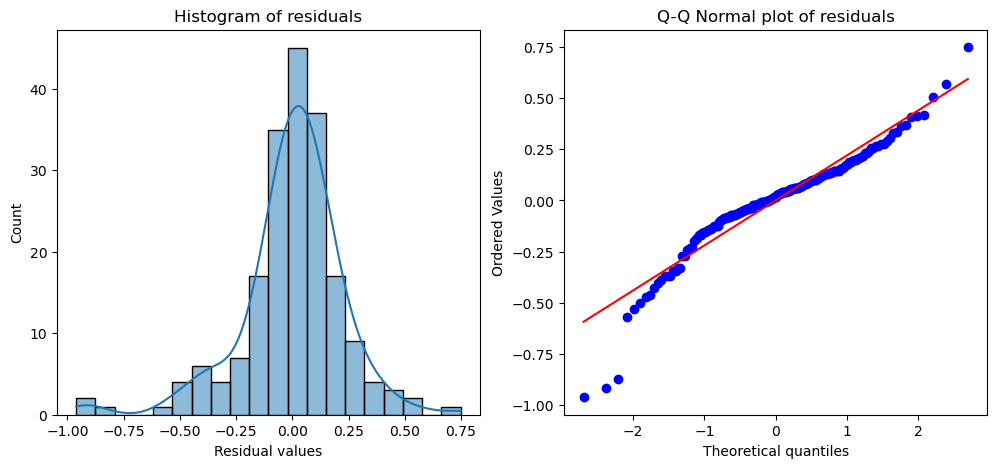

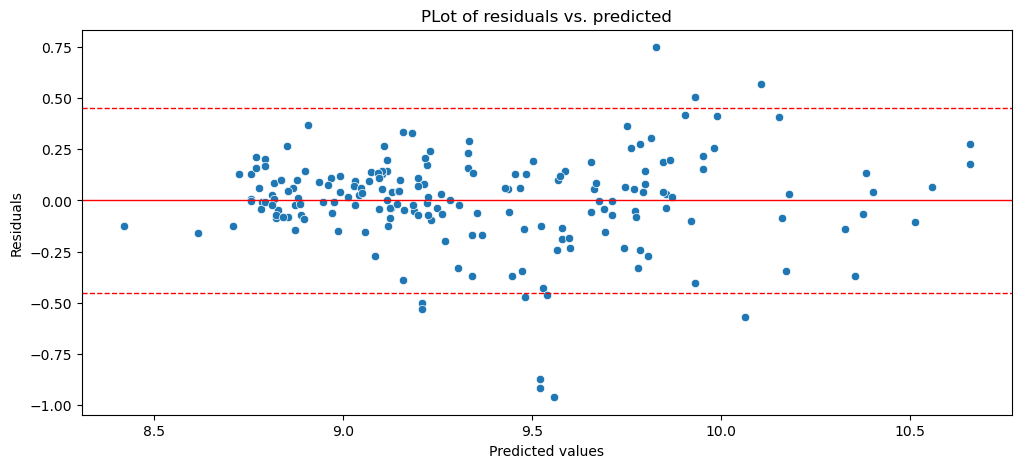

In [29]:
## Your code below
auto_price['predicted'] = auto_ols_log.predict(auto_price.curb_weight_centered)

## Compared to log of auto price, not price, since that is what we are predicting
auto_price['resids'] = np.subtract(auto_price.predicted, np.log(auto_price.price))

print('The mean of the residuals = {0:4.3f}  RMSE = {1:4.3f}'.format(np.mean(auto_price.resids), np.std(auto_price.resids)))
plot_resid_dist(auto_price.resids)
residual_plot(auto_price)  

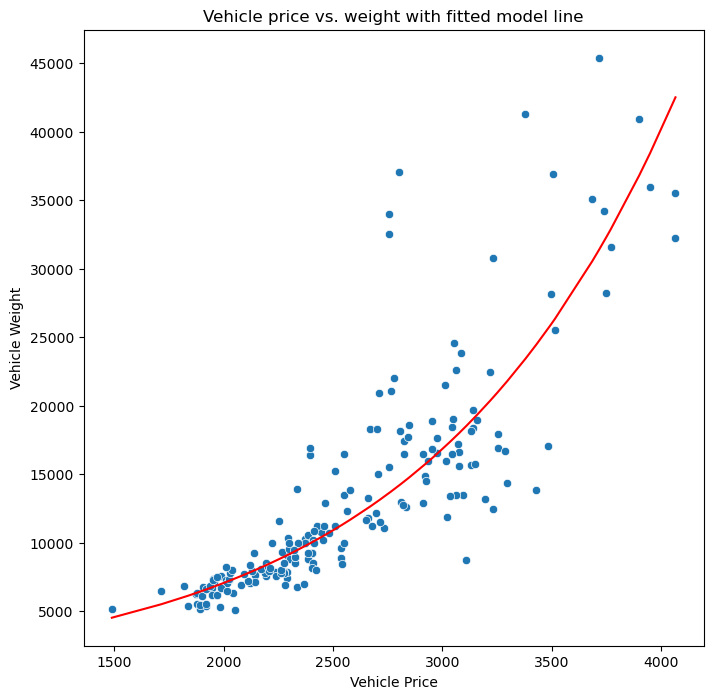

In [30]:
auto_price['predicted_transformed'] = np.exp(auto_price['predicted'])
## Plot the data and predicted values
fig,ax = plt.subplots(figsize=(8,8))
ax = sns.lineplot(x='curb_weight', y='predicted_transformed', data=auto_price, color='red');
sns.scatterplot(x='curb_weight', y='price', data=auto_price, ax=ax);
ax.set_ylabel('Vehicle Weight');
ax.set_xlabel('Vehicle Price');
ax.set_title('Vehicle price vs. weight with fitted model line');

> Examine these results and consider the answers to the following questions:
> 1. Compare the $R^2$, adjusted $R^2$ and the F-statistic between the original model and the model using the log transformed price. What does the difference say about the change in variance explained?             
> 2. How has the mean of the residuals and RMSE changed between the models?     
> 3. Do the residuals of the log price model appear to be approximately Normally distributed with zero mean?     
> 4. Are the residuals of the log transformed price model homoscedastic?     
> 5. What do the foregoing observations tell you about the fit of the log transformed price model?        
> 6. How can you interpret the model coefficients in terms of the transformed response variable? 

> **Answers:**      
> 1. The $R^2$ and F-statistic is higher in the new model. This means that our model is better fitted and has more explanatory power. This implies that variance is exponential, not constant.
> 2. The mean is once again zero, but the RMSE is much lower.
> 3. The log price residuals do seem normally distributed with zero mean.
> 4. The residuals look much more homoscedastic than before.
> 5. The fit is obviously much better.
> 6. Instead of an intercept and a linear coefficient, we now have an intercept and an exponential coefficient. This leads to a better fit because the relationship between vehicle weight and price seems to be exponential.